# Logging data with TensorFlow and TensorBoard

- Run the below cell to write logs with the tensorflow writer
- Use [jupyter-tensorboard](https://pypi.python.org/pypi/jupyter-tensorboard) in order to visualise the data
  - Go to the Jupyter file tree
  - Select the directory `logs`
  - Click the button `tensorboard` to open a new tensorboard session

In [1]:
import tensorflow as tf
import numpy as np

raw_data = np.random.normal(10,1, 100)
alpha = tf.constant(0.05)

# Nodes for the computation graph
curr_value = tf.placeholder(tf.float32)
prev_avg = tf.Variable(0.)
update_avg = alpha * curr_value + (1-alpha) * prev_avg
avg_hist = tf.summary.scalar("running_average", update_avg) # Create a summary operation with tag running_average
value_hist = tf.summary.scalar("incoming_value", curr_value) # Create a summary operation with tag incoming_values
merged_summary = tf.summary.merge_all() # Combine all summary ops into a single op that we will run later
init = tf.global_variables_initializer() # Create initialization operator (operator is created only, not executed)

# Setup summary writer
graph = tf.get_default_graph()
writer = tf.summary.FileWriter("logs", graph=graph) # Writing the graph is optional


with tf.Session() as sess: # Create a new tensorflow session
    sess.run(init) # Execute initialization operator in this session
    for i in range(len(raw_data)):
        summary_str, curr_avg = sess.run([merged_summary, update_avg], feed_dict=\
                                         {curr_value: raw_data[i]}) # Execute operators merged_summary and update_avg
        sess.run(tf.assign(prev_avg, curr_avg)) # Execute operator 
        writer.add_summary(summary_str, i) # Write the summary string, together with the gobal step i

Tensorboard visualizes the logfiles of our session

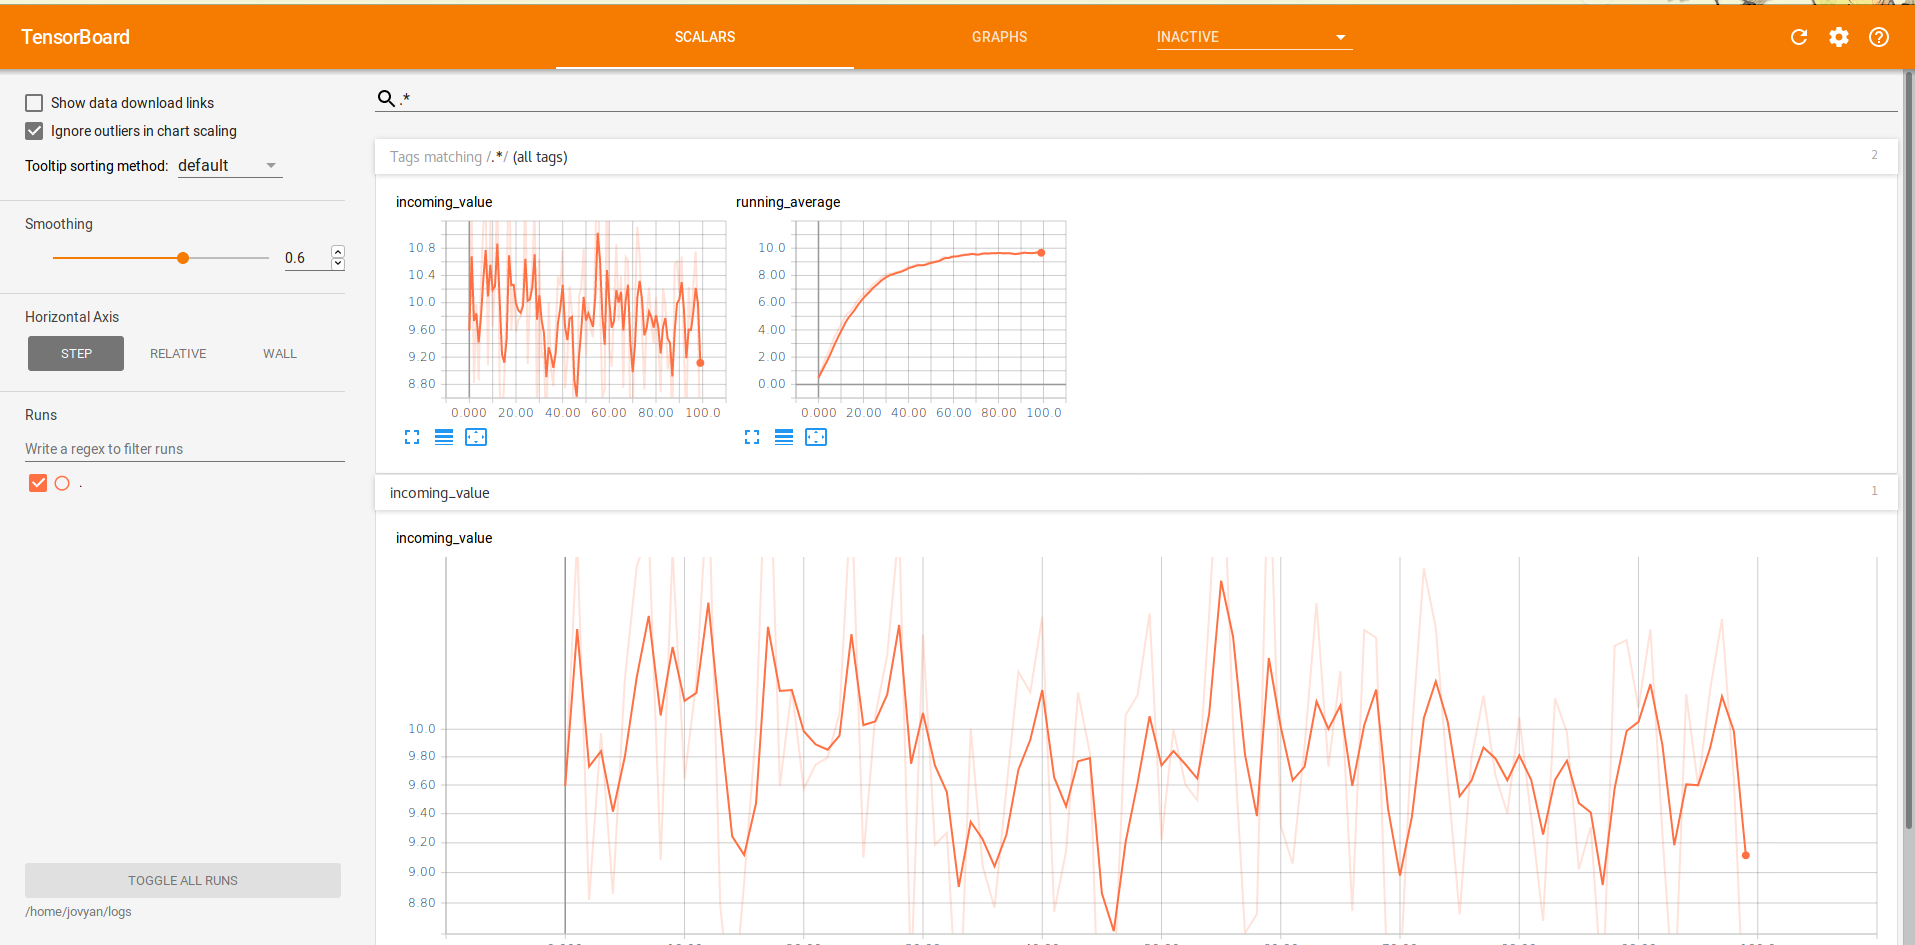

In [4]:
from IPython.display import Image
Image(filename='tensorboard_scalar.png', embed=True)